In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

from torp.io.torp_dataset import TORPDataset
import matplotlib.pyplot as plt 
import seaborn as sns
from bayeshist import bayesian_histogram, plot_bayesian_histogram
import numpy as np
import pandas as pd

In [2]:
dataset = TORPDataset(dirpath='/work2/mflora/torp_datasets/ML_data',
                      #years=[2011, 2013]
                     )
df = dataset.load_dataframe()

In [3]:
list(df.columns)

['timestamp',
 'year',
 'month',
 'day',
 'time',
 'unixTime',
 'latitude',
 'longitude',
 'radar',
 'rangeKm',
 'beginTimestamp',
 'beginYear',
 'beginMonth',
 'beginDay',
 'beginTime',
 'beginUnix',
 'beginLongitude',
 'beginLatitude',
 'endTimestamp',
 'endYear',
 'endMonth',
 'endDay',
 'endTime',
 'endUnix',
 'endLongitude',
 'endLatitude',
 'durationMin',
 'tornado',
 'spout',
 'anticyclonic',
 'hail',
 'wind',
 'severeType',
 'magnitude',
 'magnitudeType',
 'type',
 'tornadoLength',
 'tornadoWidth',
 'injuriesDirect',
 'injuriesIndirect',
 'deathsDirect',
 'deathsIndirect',
 'damageProperty',
 'damageCrops',
 'source',
 'overview',
 'details',
 'stormEventsEpisodeID',
 'stormEventsReportID',
 'oneTorID',
 'multiSegment',
 'previousSegment',
 'totalDurationMin',
 'maxMagnitudeAcrossSeg',
 'totalTornadoLength',
 'maxTornadoWidth',
 'totalInjuriesDirect',
 'totalInjuriesIndirect',
 'totalDeathsDirect',
 'totalDeathsIndirect',
 'totalDamageProperty',
 'totalDamageCrops',
 'preTornad

In [4]:
COLUMNS = [
 #'timestamp',
 'year',
 'month',
 'day',
 'time',
 #'unixTime',
 'latitude',
 'longitude',
 'radar',
 'rangeKm',
 #'beginTimestamp',
 #'beginYear',
 #'beginMonth',
 #'beginDay',
 #'beginTime',
 #'beginUnix',
 #'beginLongitude',
 #'beginLatitude',
 #'endTimestamp',
 #'endYear',
 #'endMonth',
 #'endDay',
 #'endTime',
 #'endUnix',
 #'endLongitude',
 #'endLatitude',
 'durationMin',
 'tornado',
 'spout',
 'anticyclonic',
 'hail',
 'wind',
 'severeType',
 'magnitude',
 'magnitudeType',
 #'type',
 'tornadoLength',
 'tornadoWidth',
 'injuriesDirect',
 'injuriesIndirect',
 'deathsDirect',
 'deathsIndirect',
 'damageProperty',
 'damageCrops',
 #'source',
 #'overview',
 #'details',
 #'stormEventsEpisodeID',
 #'stormEventsReportID',
 #'oneTorID',
 #'multiSegment',
 #'previousSegment',
 'totalDurationMin',
 'maxMagnitudeAcrossSeg',
 'totalTornadoLength',
 'maxTornadoWidth',
 'totalInjuriesDirect',
 'totalInjuriesIndirect',
 'totalDeathsDirect',
 'totalDeathsIndirect',
 'totalDamageProperty',
 'totalDamageCrops',
 'preTornadoTracked',
 #'stormID',
 'stormType',
 #'county',
 #'state',
 #'CWA',
 #'NWSRegion',
 #'QCd',
 #'corrected',
 #'QCnotes',
 #'autoQCnotes',
 #'season',
 'minutesFromReport',
 'minutesFromTornado',
 'distanceToNearestTornadoWithin1Hr',
 'populationDensity_15_min',
 'populationDensity_2pt5_min',
 'populationDensity_30_sec',
 'warned',
 'warningID',
 'warningType',
 'warningArea',
 'warningTornadoTag',
 'warningDamageTag',
 'pointWarningLeadTime',
 'overallWarningLeadTime',
 'rangeAzShearMax',
 'rng_int',
 #'radarTimestamp',
 'latitudeAzShearMax',
 'longitudeAzShearMax',
 'distToAzShearMax',
 'AzShear_max',
 'AzShear_mean',
 'AzShear_min',
 'AzShear_25th_percentile',
 'AzShear_median',
 'AzShear_75th_percentile',
 'DivShear_max',
 'DivShear_mean',
 'DivShear_min',
 'DivShear_25th_percentile',
 'DivShear_median',
 'DivShear_75th_percentile',
 'PhiDP_AzGradient_max',
 'PhiDP_AzGradient_mean',
 'PhiDP_AzGradient_min',
 'PhiDP_AzGradient_25th_percentile',
 'PhiDP_AzGradient_median',
 'PhiDP_AzGradient_75th_percentile',
 'PhiDP_RanGradient_max',
 'PhiDP_RanGradient_mean',
 'PhiDP_RanGradient_min',
 'PhiDP_RanGradient_25th_percentile',
 'PhiDP_RanGradient_median',
 'PhiDP_RanGradient_75th_percentile',
 'PhiDP_Gradient_max',
 'PhiDP_Gradient_mean',
 'PhiDP_Gradient_min',
 'PhiDP_Gradient_25th_percentile',
 'PhiDP_Gradient_median',
 'PhiDP_Gradient_75th_percentile',
 'PhiDP_MedianFiltered_max',
 'PhiDP_MedianFiltered_mean',
 'PhiDP_MedianFiltered_min',
 'PhiDP_MedianFiltered_25th_percentile',
 'PhiDP_MedianFiltered_median',
 'PhiDP_MedianFiltered_75th_percentile',
 'Reflectivity_AzGradient_max',
 'Reflectivity_AzGradient_mean',
 'Reflectivity_AzGradient_min',
 'Reflectivity_AzGradient_25th_percentile',
 'Reflectivity_AzGradient_median',
 'Reflectivity_AzGradient_75th_percentile',
 'Reflectivity_RanGradient_max',
 'Reflectivity_RanGradient_mean',
 'Reflectivity_RanGradient_min',
 'Reflectivity_RanGradient_25th_percentile',
 'Reflectivity_RanGradient_median',
 'Reflectivity_RanGradient_75th_percentile',
 'Reflectivity_Gradient_max',
 'Reflectivity_Gradient_mean',
 'Reflectivity_Gradient_min',
 'Reflectivity_Gradient_25th_percentile',
 'Reflectivity_Gradient_median',
 'Reflectivity_Gradient_75th_percentile',
 'Reflectivity_MedianFiltered_max',
 'Reflectivity_MedianFiltered_mean',
 'Reflectivity_MedianFiltered_min',
 'Reflectivity_MedianFiltered_25th_percentile',
 'Reflectivity_MedianFiltered_median',
 'Reflectivity_MedianFiltered_75th_percentile',
 'RhoHV_AzGradient_max',
 'RhoHV_AzGradient_mean',
 'RhoHV_AzGradient_min',
 'RhoHV_AzGradient_25th_percentile',
 'RhoHV_AzGradient_median',
 'RhoHV_AzGradient_75th_percentile',
 'RhoHV_RanGradient_max',
 'RhoHV_RanGradient_mean',
 'RhoHV_RanGradient_min',
 'RhoHV_RanGradient_25th_percentile',
 'RhoHV_RanGradient_median',
 'RhoHV_RanGradient_75th_percentile',
 'RhoHV_Gradient_max',
 'RhoHV_Gradient_mean',
 'RhoHV_Gradient_min',
 'RhoHV_Gradient_25th_percentile',
 'RhoHV_Gradient_median',
 'RhoHV_Gradient_75th_percentile',
 'RhoHV_MedianFiltered_max',
 'RhoHV_MedianFiltered_mean',
 'RhoHV_MedianFiltered_min',
 'RhoHV_MedianFiltered_25th_percentile',
 'RhoHV_MedianFiltered_median',
 'RhoHV_MedianFiltered_75th_percentile',
 'SpectrumWidth_AzGradient_max',
 'SpectrumWidth_AzGradient_mean',
 'SpectrumWidth_AzGradient_min',
 'SpectrumWidth_AzGradient_25th_percentile',
 'SpectrumWidth_AzGradient_median',
 'SpectrumWidth_AzGradient_75th_percentile',
 'SpectrumWidth_RanGradient_max',
 'SpectrumWidth_RanGradient_mean',
 'SpectrumWidth_RanGradient_min',
 'SpectrumWidth_RanGradient_25th_percentile',
 'SpectrumWidth_RanGradient_median',
 'SpectrumWidth_RanGradient_75th_percentile',
 'SpectrumWidth_Gradient_max',
 'SpectrumWidth_Gradient_mean',
 'SpectrumWidth_Gradient_min',
 'SpectrumWidth_Gradient_25th_percentile',
 'SpectrumWidth_Gradient_median',
 'SpectrumWidth_Gradient_75th_percentile',
 'SpectrumWidth_MedianFiltered_max',
 'SpectrumWidth_MedianFiltered_mean',
 'SpectrumWidth_MedianFiltered_min',
 'SpectrumWidth_MedianFiltered_25th_percentile',
 'SpectrumWidth_MedianFiltered_median',
 'SpectrumWidth_MedianFiltered_75th_percentile',
 'Vrot',
 'Vrot_Distance',
 'Velocity_Gradient_max',
 'Velocity_Gradient_mean',
 'Velocity_Gradient_min',
 'Velocity_Gradient_25th_percentile',
 'Velocity_Gradient_median',
 'Velocity_Gradient_75th_percentile',
 'Velocity_MedianFiltered_max',
 'Velocity_MedianFiltered_mean',
 'Velocity_MedianFiltered_min',
 'Velocity_MedianFiltered_25th_percentile',
 'Velocity_MedianFiltered_median',
 'Velocity_MedianFiltered_75th_percentile',
 'Zdr_AzGradient_max',
 'Zdr_AzGradient_mean',
 'Zdr_AzGradient_min',
 'Zdr_AzGradient_25th_percentile',
 'Zdr_AzGradient_median',
 'Zdr_AzGradient_75th_percentile',
 'Zdr_RanGradient_max',
 'Zdr_RanGradient_mean',
 'Zdr_RanGradient_min',
 'Zdr_RanGradient_25th_percentile',
 'Zdr_RanGradient_median',
 'Zdr_RanGradient_75th_percentile',
 'Zdr_Gradient_max',
 'Zdr_Gradient_mean',
 'Zdr_Gradient_min',
 'Zdr_Gradient_25th_percentile',
 'Zdr_Gradient_median',
 'Zdr_Gradient_75th_percentile',
 'Zdr_MedianFiltered_max',
 'Zdr_MedianFiltered_mean',
 'Zdr_MedianFiltered_min',
 'Zdr_MedianFiltered_25th_percentile',
 'Zdr_MedianFiltered_median',
 'Zdr_MedianFiltered_75th_percentile'
]



In [5]:
FEATURES = ['season',
 'minutesFromReport',
 'minutesFromTornado',
 'distanceToNearestTornadoWithin1Hr',
 'populationDensity_15_min',
 'populationDensity_2pt5_min',
 'populationDensity_30_sec',
 'warned',
 'warningID',
 'warningType',
 'warningArea',
 'warningTornadoTag',
 'warningDamageTag',
 'pointWarningLeadTime',
 'overallWarningLeadTime',
 'rangeAzShearMax',
 'rng_int',
 'radarTimestamp',
 'latitudeAzShearMax',
 'longitudeAzShearMax',
 'distToAzShearMax',
 'AzShear_max',
 'AzShear_mean',
 'AzShear_min',
 'AzShear_25th_percentile',
 'AzShear_median',
 'AzShear_75th_percentile',
 'DivShear_max',
 'DivShear_mean',
 'DivShear_min',
 'DivShear_25th_percentile',
 'DivShear_median',
 'DivShear_75th_percentile',
 'PhiDP_AzGradient_max',
 'PhiDP_AzGradient_mean',
 'PhiDP_AzGradient_min',
 'PhiDP_AzGradient_25th_percentile',
 'PhiDP_AzGradient_median',
 'PhiDP_AzGradient_75th_percentile',
 'PhiDP_RanGradient_max',
 'PhiDP_RanGradient_mean',
 'PhiDP_RanGradient_min',
 'PhiDP_RanGradient_25th_percentile',
 'PhiDP_RanGradient_median',
 'PhiDP_RanGradient_75th_percentile',
 'PhiDP_Gradient_max',
 'PhiDP_Gradient_mean',
 'PhiDP_Gradient_min',
 'PhiDP_Gradient_25th_percentile',
 'PhiDP_Gradient_median',
 'PhiDP_Gradient_75th_percentile',
 'PhiDP_MedianFiltered_max',
 'PhiDP_MedianFiltered_mean',
 'PhiDP_MedianFiltered_min',
 'PhiDP_MedianFiltered_25th_percentile',
 'PhiDP_MedianFiltered_median',
 'PhiDP_MedianFiltered_75th_percentile',
 'Reflectivity_AzGradient_max',
 'Reflectivity_AzGradient_mean',
 'Reflectivity_AzGradient_min',
 'Reflectivity_AzGradient_25th_percentile',
 'Reflectivity_AzGradient_median',
 'Reflectivity_AzGradient_75th_percentile',
 'Reflectivity_RanGradient_max',
 'Reflectivity_RanGradient_mean',
 'Reflectivity_RanGradient_min',
 'Reflectivity_RanGradient_25th_percentile',
 'Reflectivity_RanGradient_median',
 'Reflectivity_RanGradient_75th_percentile',
 'Reflectivity_Gradient_max',
 'Reflectivity_Gradient_mean',
 'Reflectivity_Gradient_min',
 'Reflectivity_Gradient_25th_percentile',
 'Reflectivity_Gradient_median',
 'Reflectivity_Gradient_75th_percentile',
 'Reflectivity_MedianFiltered_max',
 'Reflectivity_MedianFiltered_mean',
 'Reflectivity_MedianFiltered_min',
 'Reflectivity_MedianFiltered_25th_percentile',
 'Reflectivity_MedianFiltered_median',
 'Reflectivity_MedianFiltered_75th_percentile',
 'RhoHV_AzGradient_max',
 'RhoHV_AzGradient_mean',
 'RhoHV_AzGradient_min',
 'RhoHV_AzGradient_25th_percentile',
 'RhoHV_AzGradient_median',
 'RhoHV_AzGradient_75th_percentile',
 'RhoHV_RanGradient_max',
 'RhoHV_RanGradient_mean',
 'RhoHV_RanGradient_min',
 'RhoHV_RanGradient_25th_percentile',
 'RhoHV_RanGradient_median',
 'RhoHV_RanGradient_75th_percentile',
 'RhoHV_Gradient_max',
 'RhoHV_Gradient_mean',
 'RhoHV_Gradient_min',
 'RhoHV_Gradient_25th_percentile',
 'RhoHV_Gradient_median',
 'RhoHV_Gradient_75th_percentile',
 'RhoHV_MedianFiltered_max',
 'RhoHV_MedianFiltered_mean',
 'RhoHV_MedianFiltered_min',
 'RhoHV_MedianFiltered_25th_percentile',
 'RhoHV_MedianFiltered_median',
 'RhoHV_MedianFiltered_75th_percentile',
 'SpectrumWidth_AzGradient_max',
 'SpectrumWidth_AzGradient_mean',
 'SpectrumWidth_AzGradient_min',
 'SpectrumWidth_AzGradient_25th_percentile',
 'SpectrumWidth_AzGradient_median',
 'SpectrumWidth_AzGradient_75th_percentile',
 'SpectrumWidth_RanGradient_max',
 'SpectrumWidth_RanGradient_mean',
 'SpectrumWidth_RanGradient_min',
 'SpectrumWidth_RanGradient_25th_percentile',
 'SpectrumWidth_RanGradient_median',
 'SpectrumWidth_RanGradient_75th_percentile',
 'SpectrumWidth_Gradient_max',
 'SpectrumWidth_Gradient_mean',
 'SpectrumWidth_Gradient_min',
 'SpectrumWidth_Gradient_25th_percentile',
 'SpectrumWidth_Gradient_median',
 'SpectrumWidth_Gradient_75th_percentile',
 'SpectrumWidth_MedianFiltered_max',
 'SpectrumWidth_MedianFiltered_mean',
 'SpectrumWidth_MedianFiltered_min',
 'SpectrumWidth_MedianFiltered_25th_percentile',
 'SpectrumWidth_MedianFiltered_median',
 'SpectrumWidth_MedianFiltered_75th_percentile',
 'Vrot',
 'Vrot_Distance',
 'Velocity_Gradient_max',
 'Velocity_Gradient_mean',
 'Velocity_Gradient_min',
 'Velocity_Gradient_25th_percentile',
 'Velocity_Gradient_median',
 'Velocity_Gradient_75th_percentile',
 'Velocity_MedianFiltered_max',
 'Velocity_MedianFiltered_mean',
 'Velocity_MedianFiltered_min',
 'Velocity_MedianFiltered_25th_percentile',
 'Velocity_MedianFiltered_median',
 'Velocity_MedianFiltered_75th_percentile',
 'Zdr_AzGradient_max',
 'Zdr_AzGradient_mean',
 'Zdr_AzGradient_min',
 'Zdr_AzGradient_25th_percentile',
 'Zdr_AzGradient_median',
 'Zdr_AzGradient_75th_percentile',
 'Zdr_RanGradient_max',
 'Zdr_RanGradient_mean',
 'Zdr_RanGradient_min',
 'Zdr_RanGradient_25th_percentile',
 'Zdr_RanGradient_median',
 'Zdr_RanGradient_75th_percentile',
 'Zdr_Gradient_max',
 'Zdr_Gradient_mean',
 'Zdr_Gradient_min',
 'Zdr_Gradient_25th_percentile',
 'Zdr_Gradient_median',
 'Zdr_Gradient_75th_percentile',
 'Zdr_MedianFiltered_max',
 'Zdr_MedianFiltered_mean',
 'Zdr_MedianFiltered_min',
 'Zdr_MedianFiltered_25th_percentile',
 'Zdr_MedianFiltered_median',
 'Zdr_MedianFiltered_75th_percentile']

In [9]:
def find_max_freq_range(df,variable, target_variable):
    y = df[target_variable].values
        
    data = pd.to_numeric(df[variable], errors='coerce').values
    
    indices = ~np.isnan(data)
    data_sub = data[indices]
    
    bin_edges, beta_dist = bayesian_histogram(data_sub.astype(float), y[indices])
    
    mean_vals = beta_dist.mean()

    return np.max(mean_vals) - np.min(mean_vals)

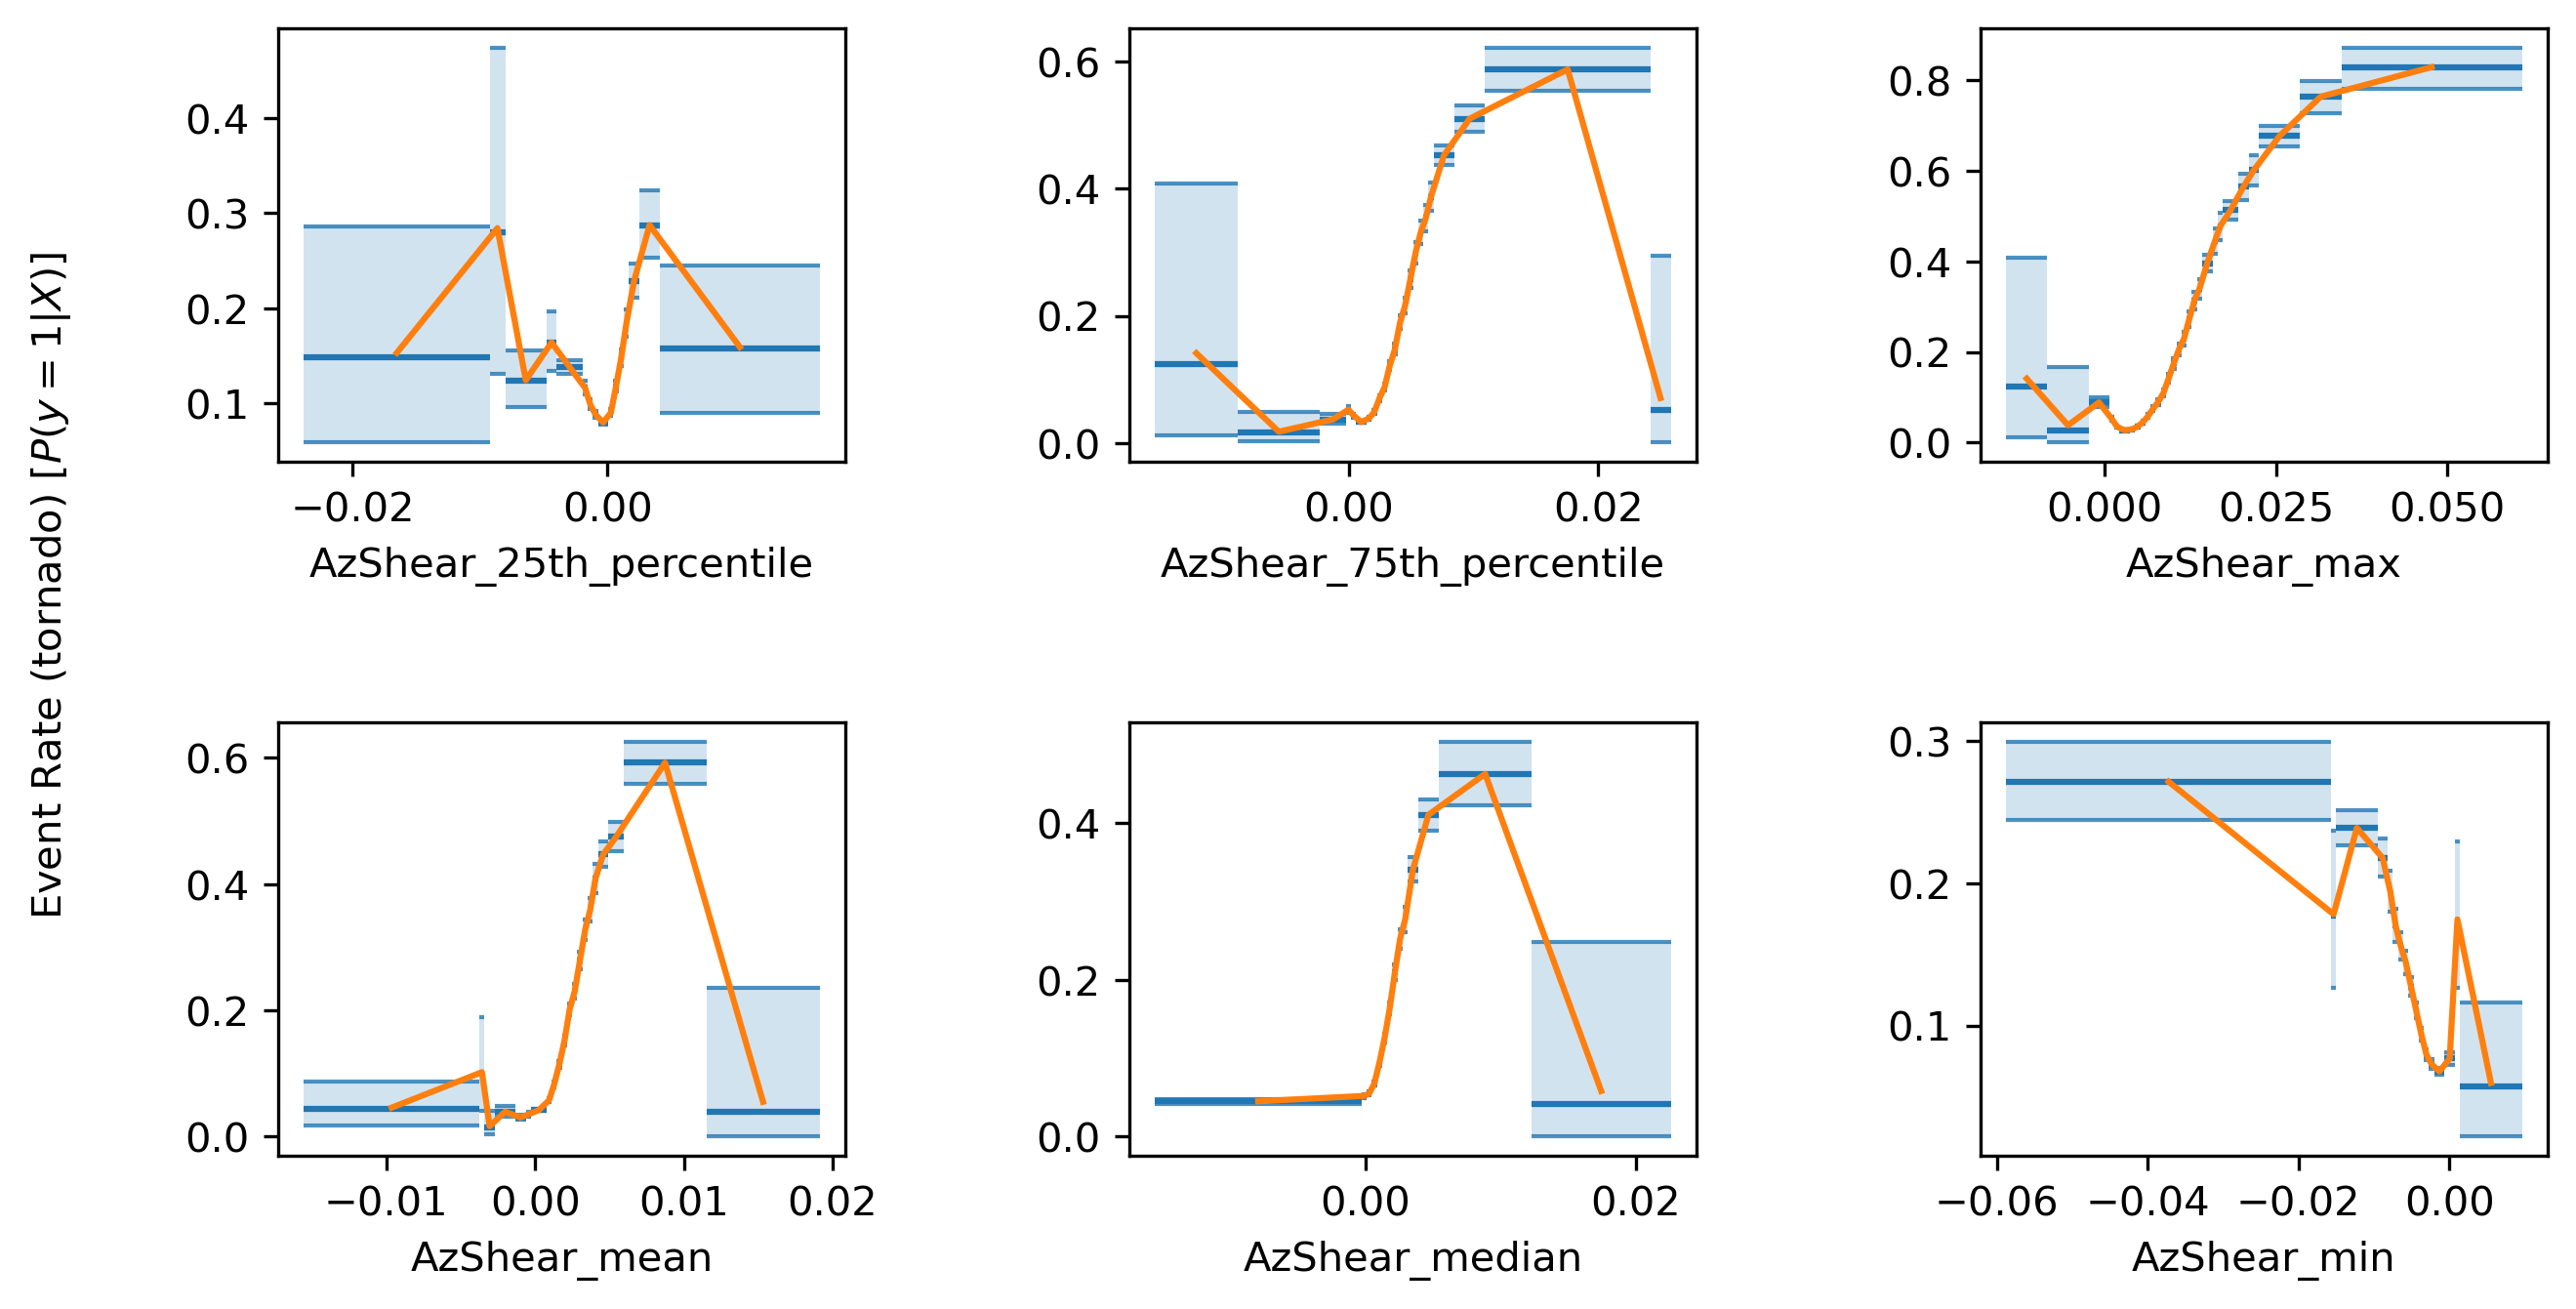

In [10]:
# Create a plotting panels. 
fig, axes =plt.subplots(dpi=300, ncols=3, nrows=2, figsize=(10,5))

# Replace the missing values with NaNs
df.replace(-99900, np.nan, inplace=True)

target_variable = 'tornado'
y = df[target_variable]
#y = df['totalDeathsIndirect'].values + df['totalInjuriesDirect'].values + df['totalInjuriesIndirect'].values
#y = (y>0).astype(float)


data_dict={}
for f in COLUMNS:
    #try:
    data_dict[f] = find_max_freq_range(df,f, target_variable)
    #except:
    #    continue
        
sorted_dict = dict(sorted(data_dict.items()))
variables = list(sorted_dict.keys())[:9]

for i, (v, ax) in enumerate(zip(variables, axes.flat)):
    data = df[v].values
    
    indices = ~np.isnan(data)
    data_sub = data[indices]
    
    bin_edges, beta_dist = bayesian_histogram(data_sub.astype(float), y[indices])
    plot_bayesian_histogram(bin_edges, beta_dist, ax=ax)
    
    ax.plot(0.5*(bin_edges[1:] + bin_edges[:-1]), beta_dist.mean())
    
    ax.set_xlabel(variables[i])
    
plt.subplots_adjust(wspace=0.5, hspace=0.6) 

fig.text(0.04, 0.5, rf'Event Rate ({target_variable}) $[P(y=1|X)]$', va='center', rotation='vertical')
plt.subplots_adjust(wspace=0.5, hspace=0.6) 